# Import libraries

In [1]:
import pandas as pd
import numpy as np
import os
import config
from sklearn.metrics import balanced_accuracy_score, accuracy_score
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
from matplotlib import rc

# Set constants

In [2]:
# set figure details
figsize = (10, 5)
dpi = 200

# set colors
healthy_color = "steelblue"
nonhealthy_color = 'orange'

# rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
# rc('text', usetex=True)
rc("svg", fonttype="none") 

# Load data

In [3]:
X = pd.read_csv(os.path.join(config.CLEAN_DIR, "taxonomic_features.csv"), index_col=[0, 1])
y = pd.read_csv(os.path.join(config.CLEAN_DIR, "metadata.csv"), index_col=[0, 1]).iloc[:, [0]]

# get training set predictions
gmhi2_scores_training_set = pd.read_csv(os.path.join(config.LOG_DIR, "gmhi2_scores_training_set.csv"), index_col=[0, 1])
# get ISV predictions
gmhi2_scores_ISV = pd.read_csv(os.path.join(config.LOG_DIR, "gmhi2_scores_ISV.csv"), index_col=[0, 1])


display(gmhi2_scores_training_set.head())
display(y.head())

GMHI2
Study_ID Sample Accession          
GMHI-10  SAMN03283239      1.835237
         SAMN03283266      0.103722
         SAMN03283281      1.116329
         SAMN03283294      1.758818
         SAMN03283288      1.675791

PHENOTYPE:Healthy_Nonhealthy
Study_ID Sample Accession                              
GMHI-10  SAMN03283239                              True
         SAMN03283266                              True
         SAMN03283281                              True
         SAMN03283294                              True
         SAMN03283288                              True

In [4]:
def get_cutoff_performance_df(scores, max_cutoff, interval=0.1):
    dict_list = []
    for cutoff in np.arange(0, max_cutoff + interval, interval):
        idx = (abs(scores) >= cutoff).values
        samples_retained = float(idx.sum())
        bal_acc = balanced_accuracy_score(y[idx], scores[idx] > 0)
        dict_list.append({
            "cutoff" : cutoff,
            "samples retained" : samples_retained,
            "bal_acc" : bal_acc
        })
    df = pd.DataFrame(dict_list)
    return df

In [5]:
def plot_performance_vs_cutoff(scores, max_cutoff, left_y_label, filename):
    df = get_cutoff_performance_df(scores, max_cutoff)
    display(df)
    fig, ax1 = plt.subplots(figsize=figsize, dpi=dpi)

    ax2 = ax1.twinx()
    ax1.plot(df["cutoff"], df["bal_acc"], c="steelblue")
    ax2.plot(df["cutoff"], df["samples retained"], c="orange")

    ax1.set_axisbelow(True)
    ax1.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    ax1.grid(linestyle = '--', linewidth = 0.75)

    ax1.tick_params(axis="both", labelsize=15)
    ax2.tick_params(axis="both", labelsize=15)

    ax1.set_ylabel(left_y_label, fontsize=15)
    ax2.set_ylabel("Samples retained", fontsize=15)
    ax1.set_xlabel("GMHI2 Magnitude Cutoff", fontsize=15)

    plt.savefig(os.path.join(config.FIGURE_DIR, filename), bbox_inches='tight')

,cutoff,samples retained,bal_acc
0,0.0,8069.0,0.798853
1,0.1,7719.0,0.811917
2,0.2,7333.0,0.824876
3,0.3,7004.0,0.835330
4,0.4,6691.0,0.846499
5,0.5,6364.0,0.857515
6,0.6,6029.0,0.870530
7,0.7,5664.0,0.882040
8,0.8,5365.0,0.891837
9,0.9,5049.0,0.901703


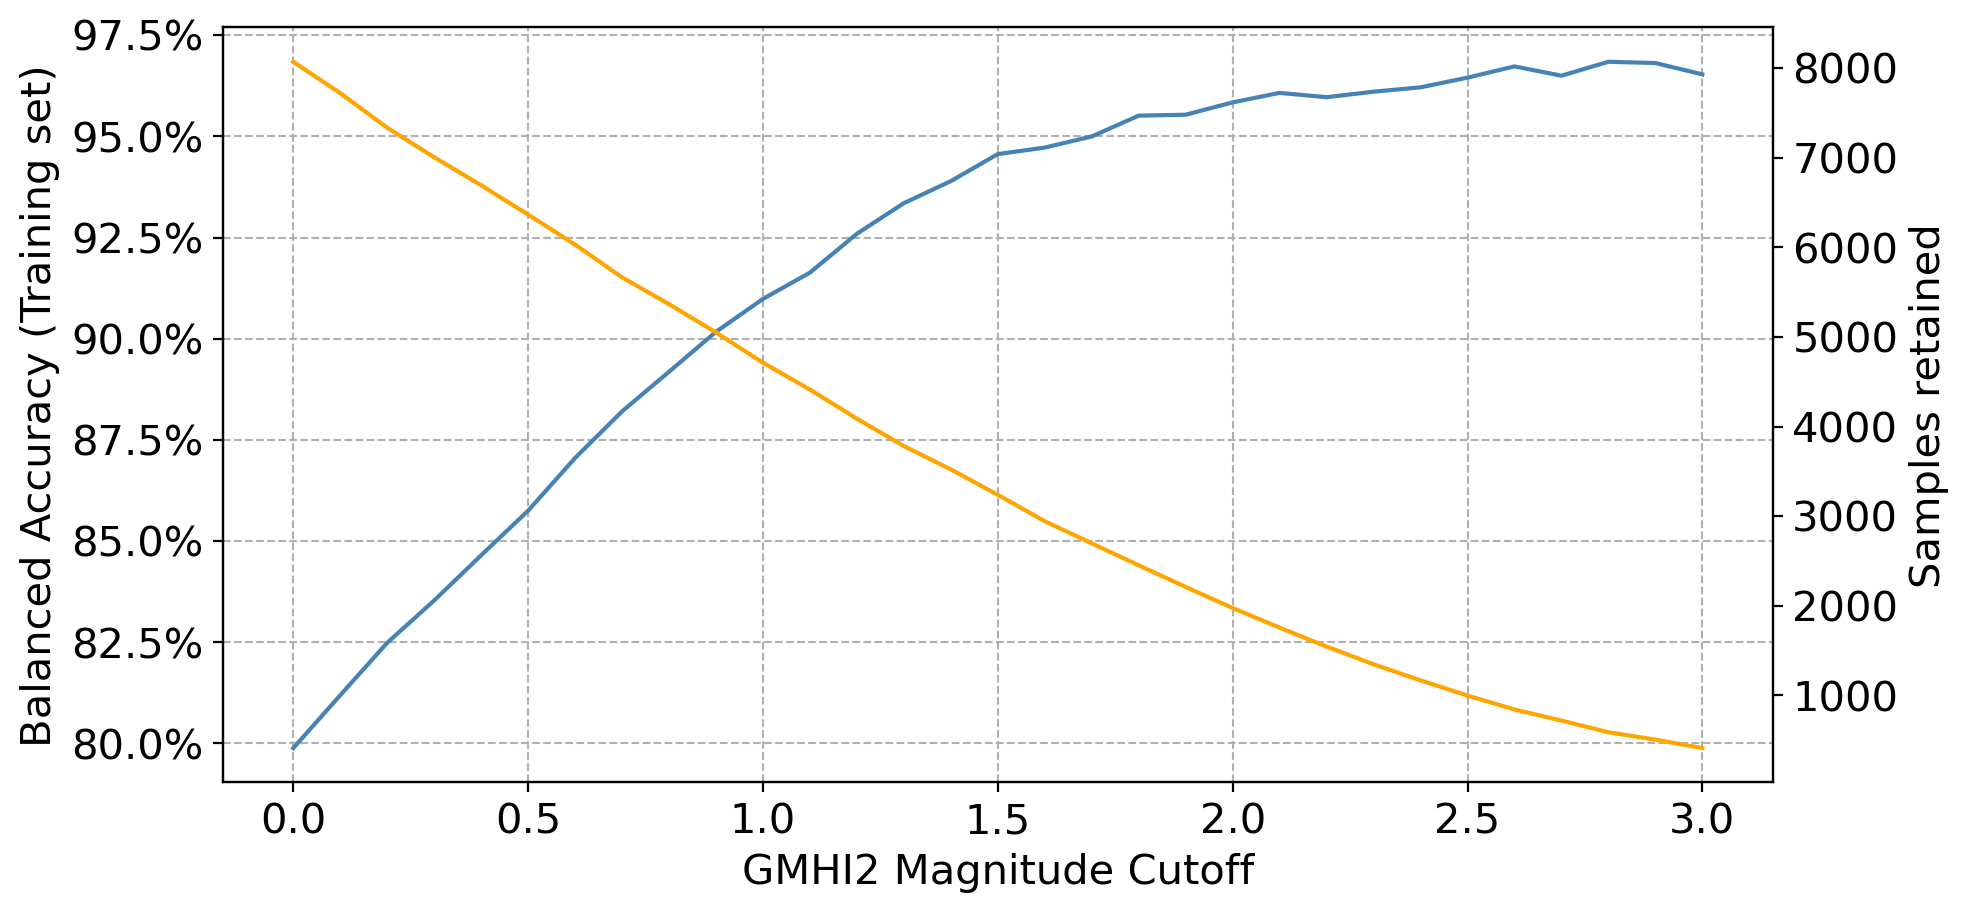

In [6]:
filename = "performance_vs_cutoff_training.svg"
left_y_label = "Balanced Accuracy (Training set)"
max_cutoff = 3
plot_performance_vs_cutoff(gmhi2_scores_training_set, 3, left_y_label, filename)

,cutoff,samples retained,bal_acc
0,0.0,8069.0,0.757593
1,0.1,7666.0,0.771291
2,0.2,7266.0,0.783056
3,0.3,6882.0,0.795897
4,0.4,6531.0,0.805657
5,0.5,6146.0,0.817848
6,0.6,5758.0,0.829992
7,0.7,5392.0,0.840021
8,0.8,5041.0,0.849685
9,0.9,4690.0,0.859936


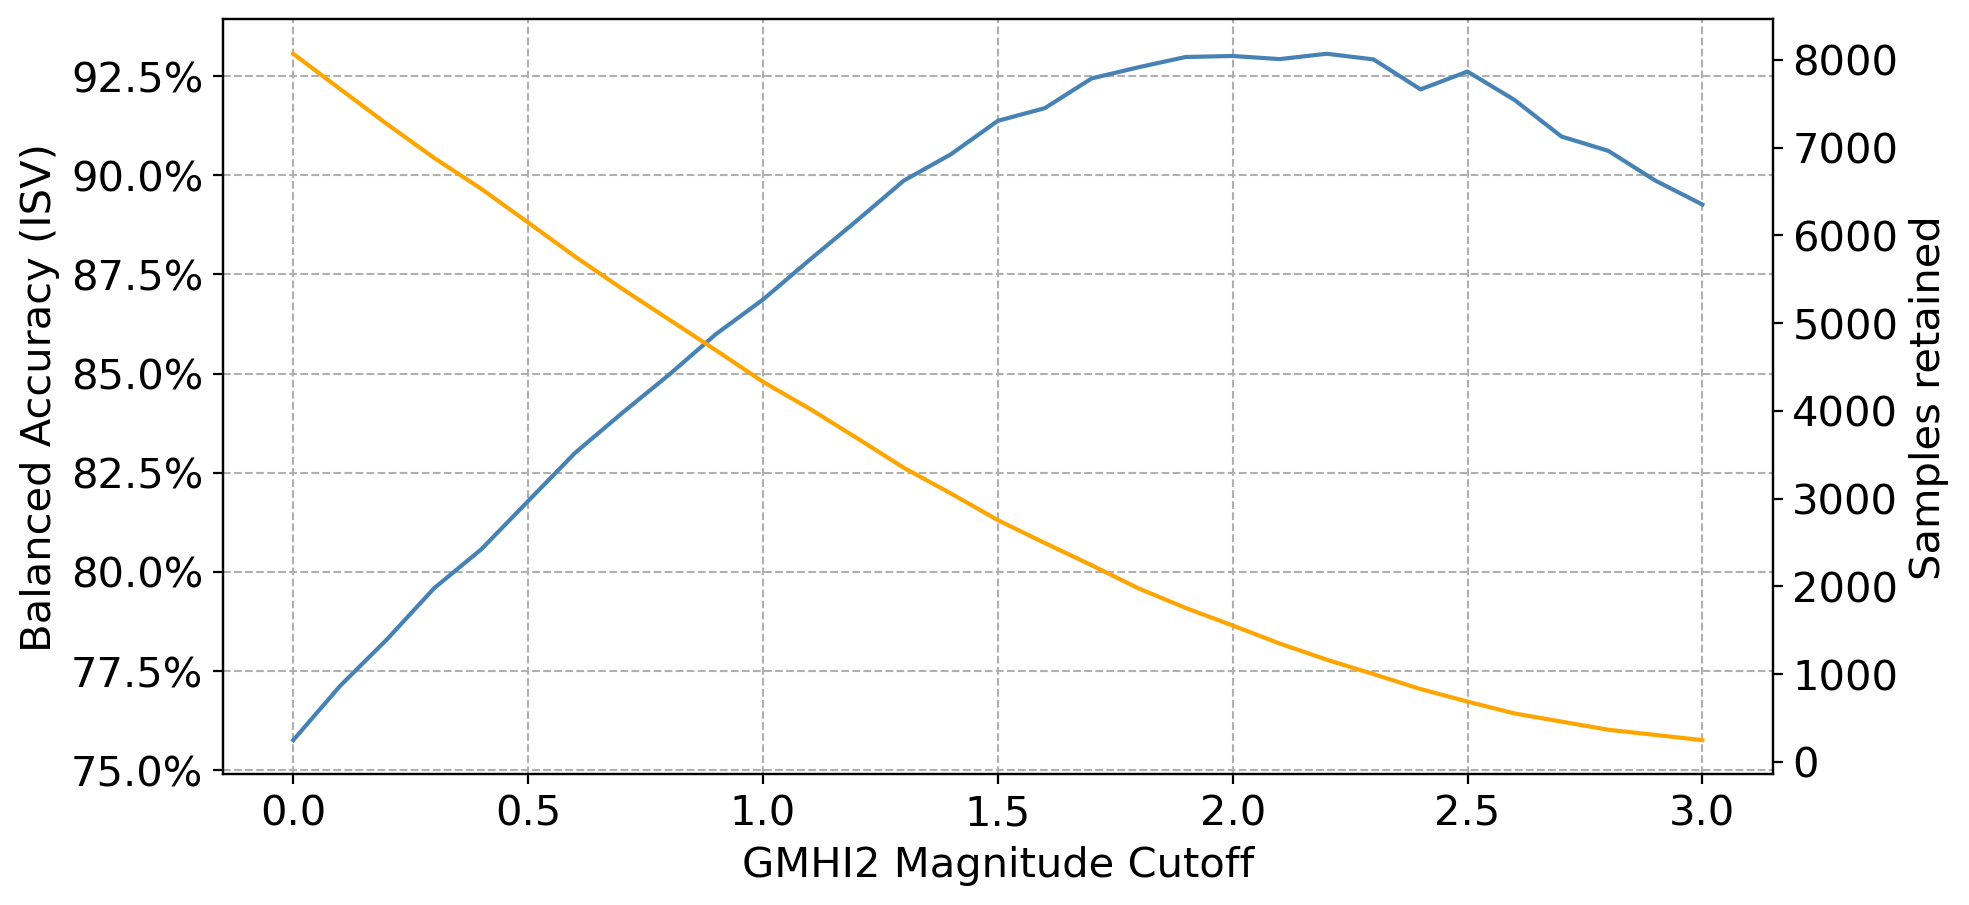

In [7]:
filename = "performance_vs_cutoff_ISV.svg"
left_y_label = "Balanced Accuracy (ISV)"
max_cutoff = 3
plot_performance_vs_cutoff(gmhi2_scores_ISV, 3, left_y_label, filename)